In [19]:
# BOILERPLATE CODE

#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

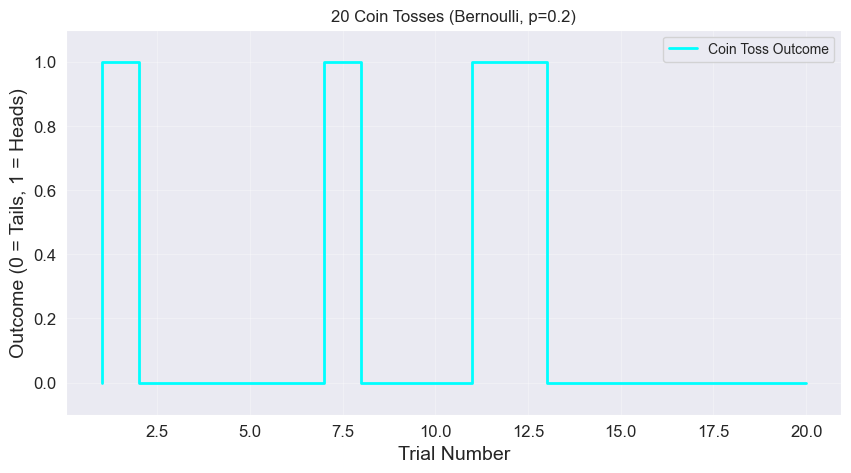

Number of heads: 4
Number of tails: 16


In [20]:
# PART A

import numpy as np
import matplotlib.pyplot as plt


p = 0.2
n_tosses = 20

outcomes = np.random.binomial(1, p, n_tosses)

plt.figure(figsize=(10, 5))
plt.step(range(1, n_tosses+1), outcomes, where='pre', color='cyan', linewidth=2, label='Coin Toss Outcome')
plt.xlabel('Trial Number')
plt.ylabel('Outcome (0 = Tails, 1 = Heads)')
plt.title('20 Coin Tosses (Bernoulli, p=0.2)')
plt.ylim(-0.1, 1.1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

num_heads = np.sum(outcomes)
num_tails = n_tosses - num_heads
print(f"Number of heads: {num_heads}")
print(f"Number of tails: {num_tails}")


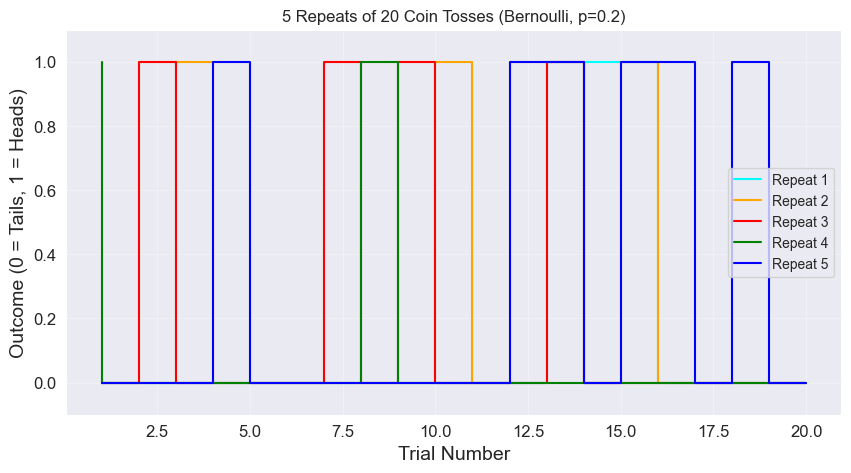

Repeat 1: 3 heads
Repeat 2: 5 heads
Repeat 3: 4 heads
Repeat 4: 2 heads
Repeat 5: 6 heads


In [21]:
# PART B

n_repeats = 5
all_outcomes = np.random.binomial(1, p, (n_repeats, n_tosses))

plt.figure(figsize=(10, 5))
colors = ['cyan', 'orange', 'red', 'green', 'blue']
for i in range(n_repeats):
    plt.step(range(1, n_tosses+1), all_outcomes[i], where='pre',
             color=colors[i], linewidth=1.5, label=f'Repeat {i+1}')

plt.xlabel('Trial Number')
plt.ylabel('Outcome (0 = Tails, 1 = Heads)')
plt.title('5 Repeats of 20 Coin Tosses (Bernoulli, p=0.2)')
plt.ylim(-0.1, 1.1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

heads_per_repeat = np.sum(all_outcomes, axis=1)
for i in range(n_repeats):
    print(f"Repeat {i+1}: {heads_per_repeat[i]} heads")


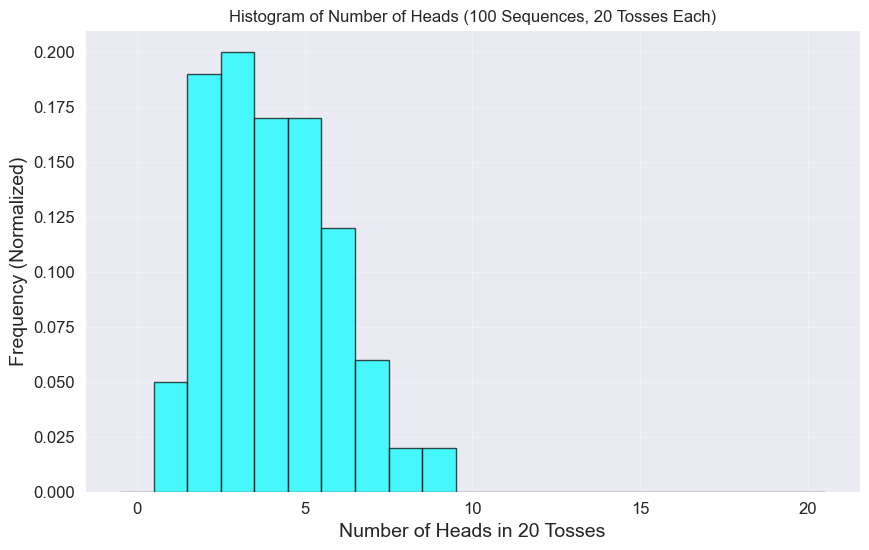

Mean number of heads: 4.04
Variance: 3.42


In [22]:
# PART C
n_sequences = 100
all_sequences = np.random.binomial(1, p, (n_sequences, n_tosses))

heads_per_sequence = np.sum(all_sequences, axis=1)

plt.figure(figsize=(10, 6))
plt.hist(heads_per_sequence, bins=np.arange(-0.5, n_tosses+1.5, 1),
         edgecolor='black', color='cyan', alpha=0.7, density=True)
plt.xlabel('Number of Heads in 20 Tosses')
plt.ylabel('Frequency (Normalized)')
plt.title('Histogram of Number of Heads (100 Sequences, 20 Tosses Each)')
plt.grid(True, alpha=0.3)
plt.show()

mean_heads = np.mean(heads_per_sequence)
variance_heads = np.var(heads_per_sequence)
print(f"Mean number of heads: {mean_heads:.2f}")
print(f"Variance: {variance_heads:.2f}")


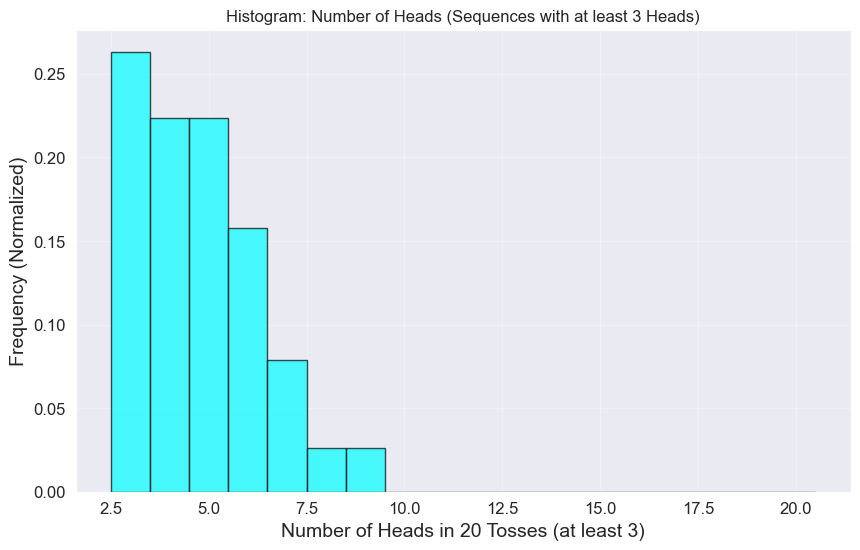

Number of sequences with at least 3 heads: 76 out of 100 (76.0%)
Mean number of heads in these sequences: 4.75


In [23]:
# PART D

threshold = 3
mask_at_least_3 = heads_per_sequence >= threshold
sequences_at_least_3 = all_sequences[mask_at_least_3]
heads_at_least_3 = heads_per_sequence[mask_at_least_3]

plt.figure(figsize=(10, 6))
plt.hist(heads_at_least_3, bins=np.arange(threshold-0.5, n_tosses+1.5, 1),
         edgecolor='black', color='cyan', alpha=0.7, density=True)
plt.xlabel(f'Number of Heads in 20 Tosses (at least {threshold})')
plt.ylabel('Frequency (Normalized)')
plt.title(f'Histogram: Number of Heads (Sequences with at least {threshold} Heads)')
plt.grid(True, alpha=0.3)
plt.show()

count_at_least_3 = len(heads_at_least_3)
percentage = (count_at_least_3 / n_sequences) * 100
mean_conditional = np.mean(heads_at_least_3)
print(f"Number of sequences with at least {threshold} heads: {count_at_least_3} out of {n_sequences} ({percentage:.1f}%)")
print(f"Mean number of heads in these sequences: {mean_conditional:.2f}")


In [24]:
# SECOND PROBLEM

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alphas = np.random.uniform(0, 100, 4)
alphas.sort()

print("Selected α values:", alphas)


Selected α values: [41.77609793 50.52067736 80.36035354 96.71266153]


In [17]:
def find_suitable_n(alpha):
    n_min = int(10 * alpha)
    n = max(n_min, 20)
    p = alpha / n

    return n, p

For α = 41.78: n = 417, p = 0.100182, n*p = 41.78
For α = 50.52: n = 505, p = 0.100041, n*p = 50.52
For α = 80.36: n = 803, p = 0.100075, n*p = 80.36
For α = 96.71: n = 967, p = 0.100013, n*p = 96.71


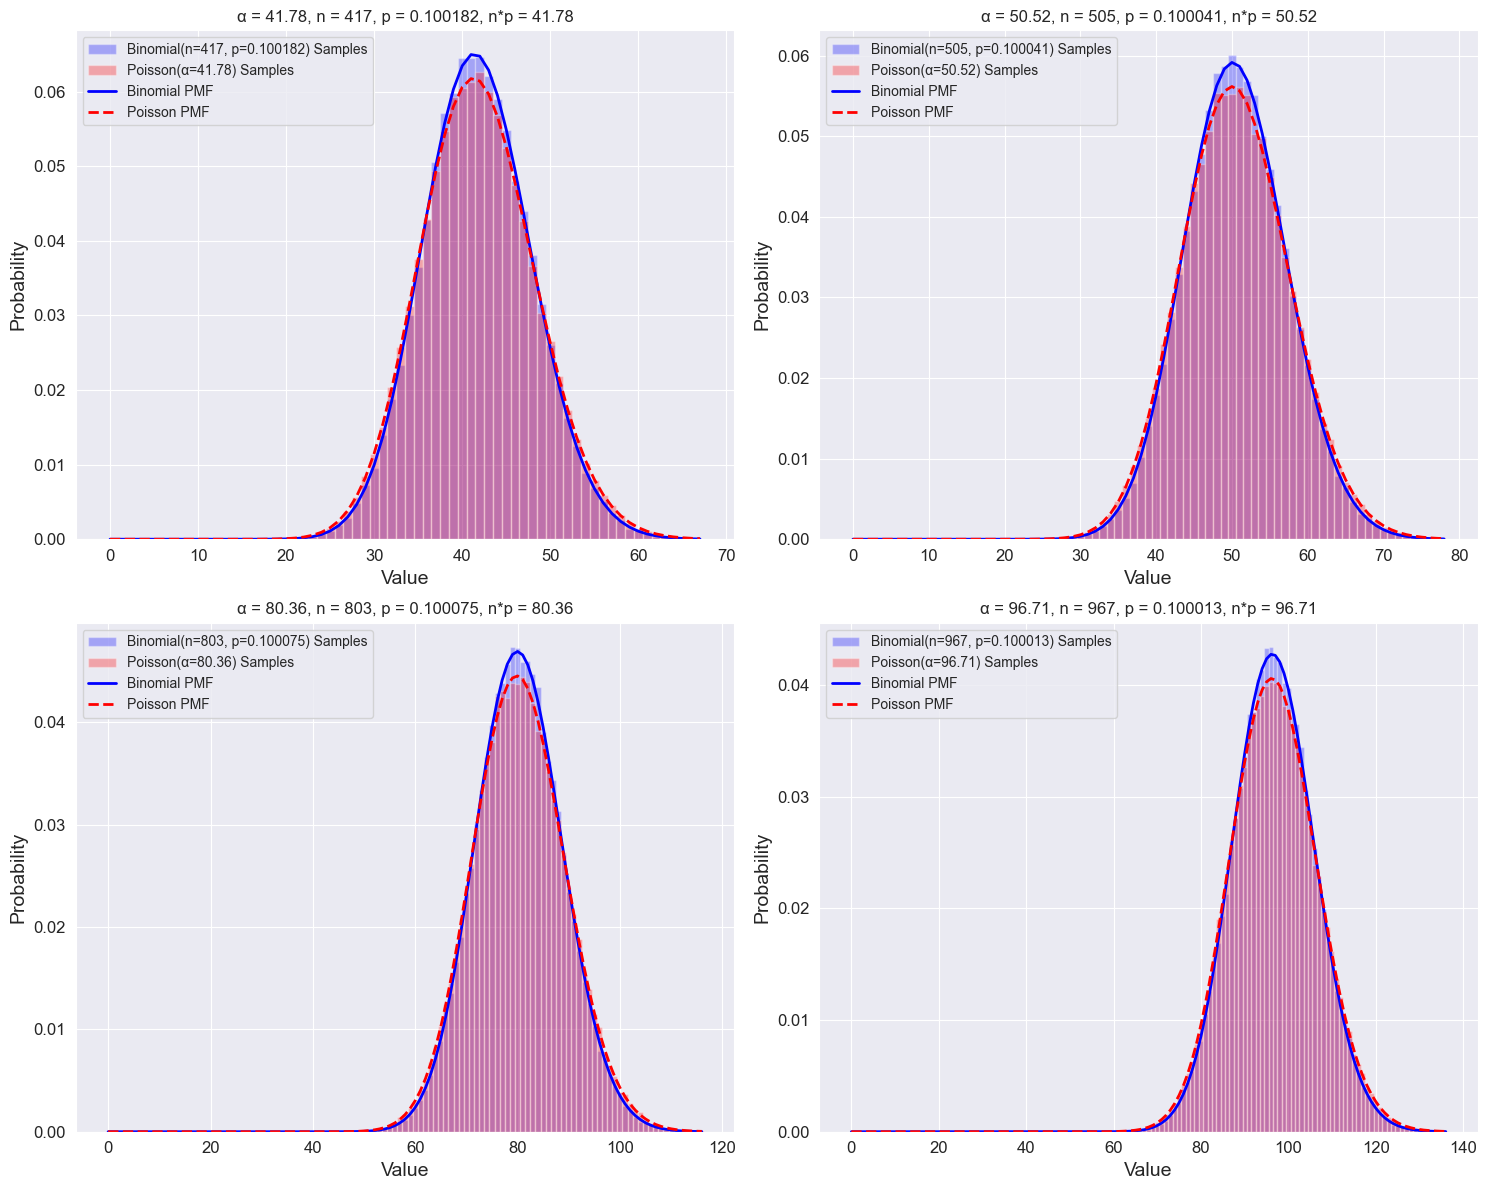

In [25]:
num_samples = 100000

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, alpha in enumerate(alphas):
    n, p = find_suitable_n(alpha)

    binomial_samples = np.random.binomial(n, p, num_samples)
    poisson_samples = np.random.poisson(alpha, num_samples)

    max_val = max(np.max(binomial_samples), np.max(poisson_samples))
    max_val = min(max_val + 10, int(alpha + 4 * np.sqrt(alpha)))
    bins = np.arange(0, max_val + 2) - 0.5

    axes[i].hist(binomial_samples, bins=bins, density=True, alpha=0.3,
                 label=f'Binomial(n={n}, p={p:.6f}) Samples', color='blue')
    axes[i].hist(poisson_samples, bins=bins, density=True, alpha=0.3,
                 label=f'Poisson(α={alpha:.2f}) Samples', color='red')

    x = np.arange(0, max_val + 1)
    binom_pmf = stats.binom.pmf(x, n, p)
    poisson_pmf = stats.poisson.pmf(x, alpha)

    axes[i].plot(x, binom_pmf, 'b-', linewidth=2, label='Binomial PMF')
    axes[i].plot(x, poisson_pmf, 'r--', linewidth=2, label='Poisson PMF')

    axes[i].set_title(f'α = {alpha:.2f}, n = {n}, p = {p:.6f}, n*p = {n*p:.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability')
    axes[i].legend()

    print(f"For α = {alpha:.2f}: n = {n}, p = {p:.6f}, n*p = {n*p:.2f}")

plt.tight_layout()
plt.show()

In [26]:
for i, alpha in enumerate(alphas):
    n, p = find_suitable_n(alpha)

    # Calculate PMFs over a suitable range
    max_val = int(alpha + 5 * np.sqrt(alpha))
    x = np.arange(0, max_val + 1)
    binom_pmf = stats.binom.pmf(x, n, p)
    poisson_pmf = stats.poisson.pmf(x, alpha)

    tv_distance = 0.5 * np.sum(np.abs(binom_pmf - poisson_pmf))

    print(f"For α = {alpha:.2f}: Total variation distance = {tv_distance:.6f}")


For α = 41.78: Total variation distance = 0.025551
For α = 50.52: Total variation distance = 0.025469
For α = 80.36: Total variation distance = 0.025524
For α = 96.71: Total variation distance = 0.025517


In [27]:
# THIRD PROBLEM

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

alphas = np.random.uniform(1, 20, 2)
print("Selected α values:", alphas)


Selected α values: [5.17076119 8.19156762]


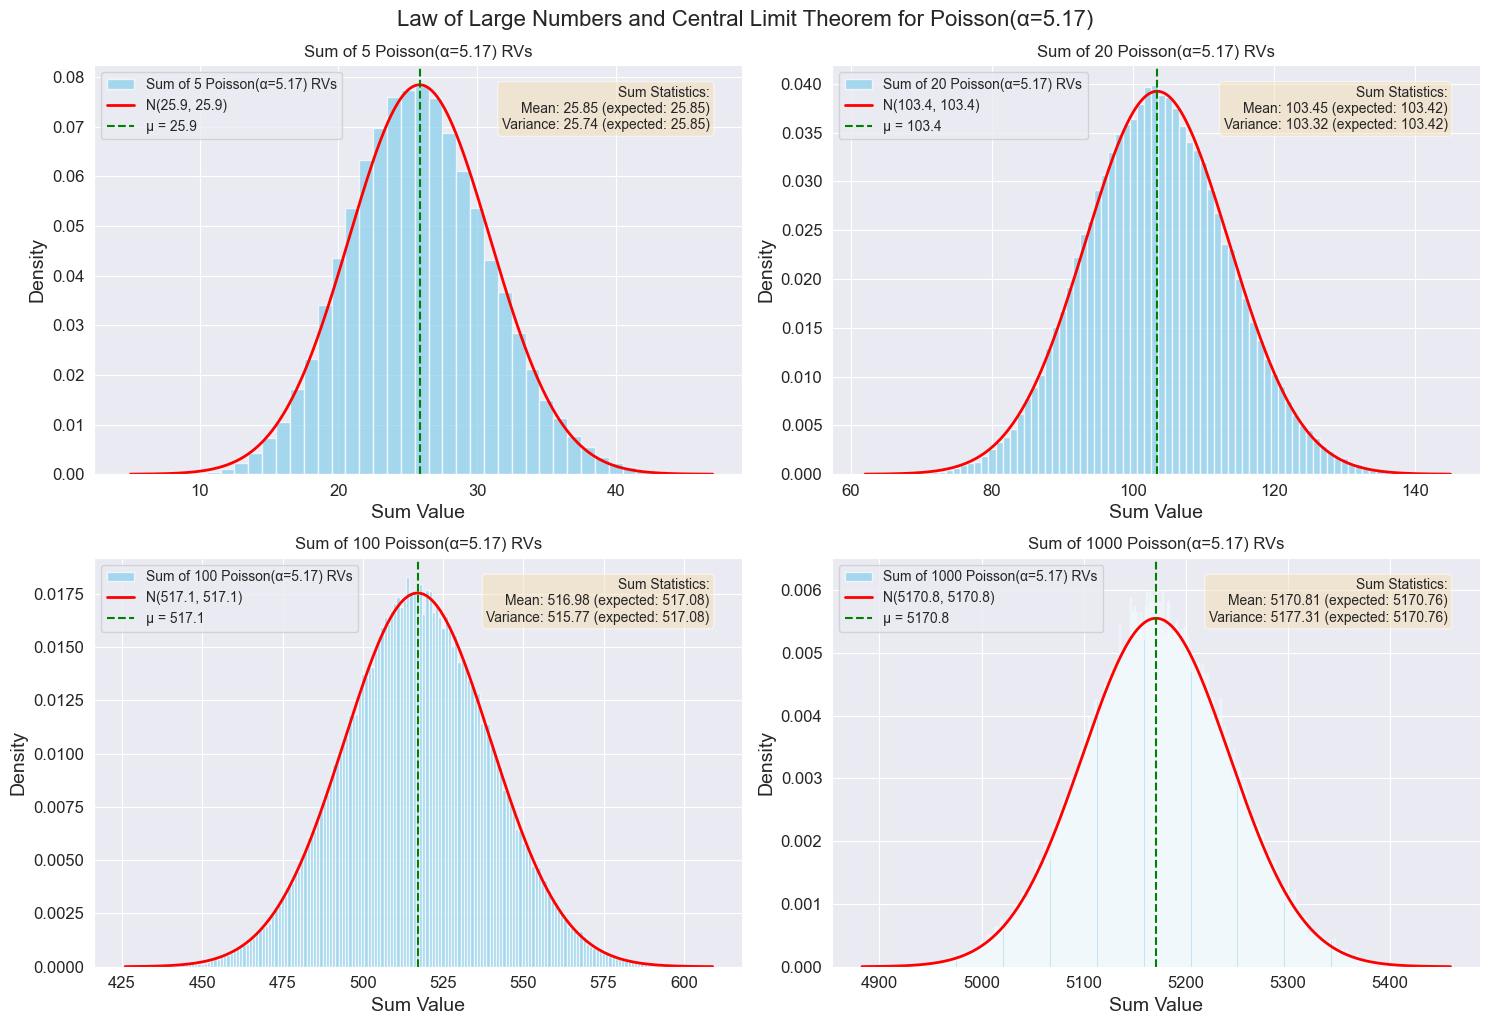

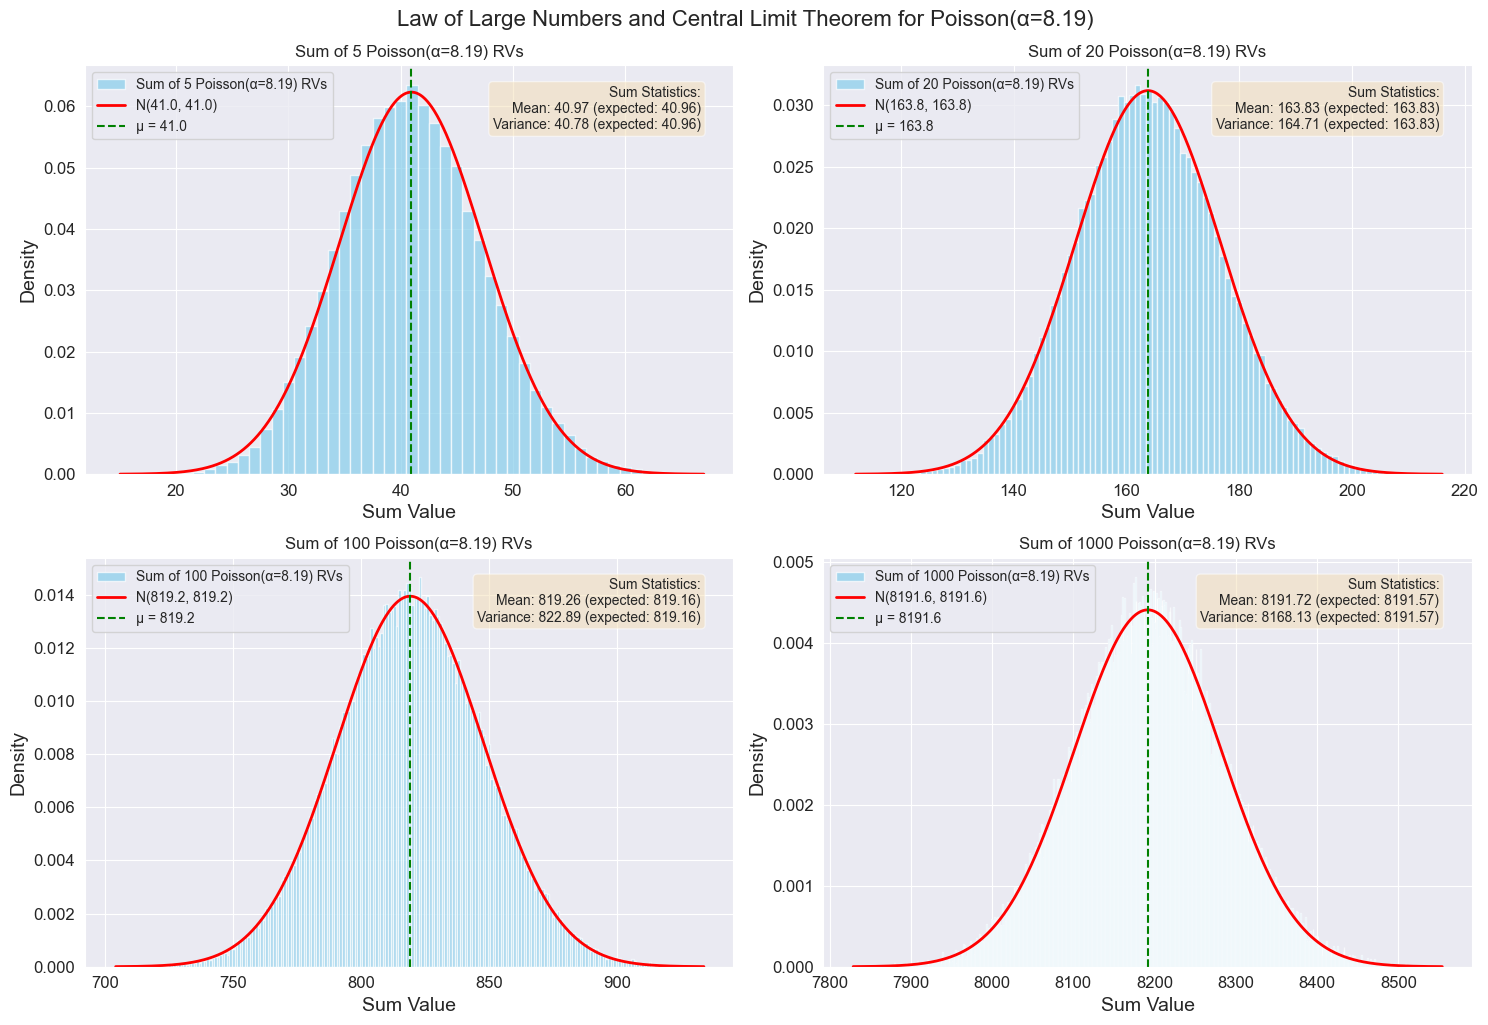

In [28]:
sequence_lengths = [5, 20, 100, 1000]

n_samples = 100000

for alpha in alphas:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, n in enumerate(sequence_lengths):
        poisson_rvs = np.random.poisson(alpha, (n_samples, n))

        sum_values = np.sum(poisson_rvs, axis=1)

        theoretical_mean = n * alpha
        theoretical_var = n * alpha
        theoretical_std = np.sqrt(theoretical_var)

        min_val = max(0, int(theoretical_mean - 4*theoretical_std))
        max_val = int(theoretical_mean + 4*theoretical_std) + 1
        bins = np.arange(min_val, max_val + 1) - 0.5

        ax = axes[i]
        ax.hist(sum_values, bins=bins, density=True, alpha=0.7,
                color='skyblue', label=f'Sum of {n} Poisson(α={alpha:.2f}) RVs')

        x = np.linspace(min_val, max_val, 1000)
        normal_pdf = stats.norm.pdf(x, theoretical_mean, theoretical_std)
        ax.plot(x, normal_pdf, 'r-', linewidth=2,
                label=f'N({theoretical_mean:.1f}, {theoretical_var:.1f})')

        ax.axvline(theoretical_mean, color='green', linestyle='--',
                   label=f'μ = {theoretical_mean:.1f}')

        emp_mean = np.mean(sum_values)
        emp_var = np.var(sum_values)

        textstr = (f'Sum Statistics:\n'
                   f'Mean: {emp_mean:.2f} (expected: {theoretical_mean:.2f})\n'
                   f'Variance: {emp_var:.2f} (expected: {theoretical_var:.2f})')

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='right', bbox=props)

        ax.set_title(f'Sum of {n} Poisson(α={alpha:.2f}) RVs')
        ax.set_xlabel('Sum Value')
        ax.set_ylabel('Density')
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.suptitle(f'Law of Large Numbers and Central Limit Theorem for Poisson(α={alpha:.2f})',
                 y=1.02, fontsize=16)
    plt.show()
